# Titanic: Machine Learning from Disaster

## Predict survival on the Titanic

In this Jupyter Notebook we will use Titanic dataset provided by Kaggle. We will use machine learning to create models that predict which passengers survived the Titanic shipwreck.

## Data exploration

To begin with, the imports are prepared and the datasets are loaded into a Pandas Dataframes.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")

First values of train and test dataset are viewed.

In [3]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [7]:
train_data.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

Training dataset has 891 rows and 12 columns (one column is called *survived* - it's our label in classification), test dataset has 418 rows and 11 columns. To check model quality we have to submit our prediction results to the Kaggle competition.
*PassengerId*, *Name*, *Ticket* and *Cabin* have many unique object values that won't be used for prdictions. *Age* and *Fare* are numeric values, so they can be divided into ranges.

### Missing values

Firstly we have to check if any attributes have missing values.

In [8]:
train_data.count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

In [9]:
test_data.count()

PassengerId    418
Pclass         418
Name           418
Sex            418
Age            332
SibSp          418
Parch          418
Ticket         418
Fare           417
Cabin           91
Embarked       418
dtype: int64

There are missing values for *Age*, *Embarked*, *Fare* and *Cabin* features. Their counts are respectively 263, 2, 1 and 1014. We will try to fill the missing values in first three categories. The cabin have mainly unique values and there are too many missing data so we will drop it from the dataset.

For analysis purpose bar and line charts will be used.

In [10]:
def bar_chart(data, feature):
    survived = data[data['Survived']==1][feature].value_counts()
    dead = data[data['Survived']==0][feature].value_counts()
    df = pd.DataFrame([survived, dead])
    df.index = ['Survived', 'Dead']
    df.plot(kind='bar', stacked=True, figsize=(10,6), title=feature)
    plt.show()
    
def line_chart(data, feature, lim_beg=0, lim_end=None, lim1_beg=0, lim1_end=None):
    for x in [0,1]:
        data[feature][data.Survived == x].plot(kind="kde", figsize=(10,6))
    plt.title(feature)
    plt.legend(("Dead", "Survived"))
    plt.xlim(lim_beg, lim_end)
    plt.ylim(lim1_beg, lim1_end)
    plt.show()

### Pclass

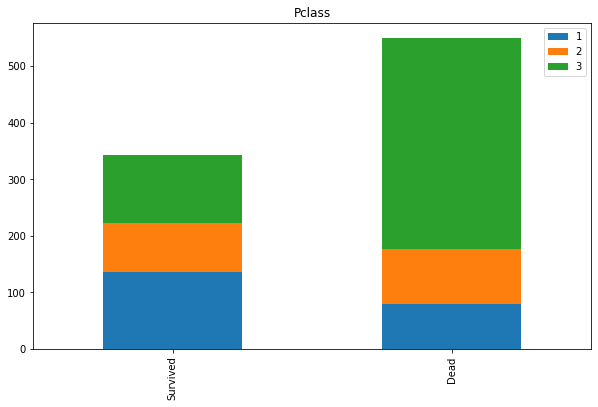

In [11]:
bar_chart(train_data, 'Pclass')

The number of passengers in the third class was bigger than the number of passengers in the first and second class combined. The survival chances in first class were the biggest (more than half of the passengers survived). The survival chances in third class were the smallest (less than 25% of the passengers survived).

### Title

Every passenger have a title assigned. The *Name* column is pretty useless for further data operations, but it is good idea to seperate the title from it. It might keep useful information about the social status and age, what can be important for surviving.

In [12]:
train_data['Title'] = train_data['Name'].str.extract(' ([A-Za-z]+)\.')
train_data['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Ms            1
Countess      1
Jonkheer      1
Don           1
Capt          1
Sir           1
Lady          1
Mme           1
Name: Title, dtype: int64

Most of the passengers has *Mr*, *Miss*, *Mrs* or *Master* title. To prepare dummies, the rest of values will be categorized as *Other*.

In [13]:
def title_categories(title):
    titles = ["Mr", "Master", "Miss", "Mrs"]
    if title in titles:
        return title
    else:
        return "Other"
    

train_data['Title'] = train_data['Title'].map(title_categories)
train_data = pd.concat([train_data, pd.get_dummies(train_data['Title'])], axis=1)

test_data['Title'] = test_data['Name'].str.extract(' ([A-Za-z]+)\.')
test_data['Title'] = test_data['Title'].map(title_categories)
test_data = pd.concat([test_data, pd.get_dummies(test_data['Title'])], axis=1)

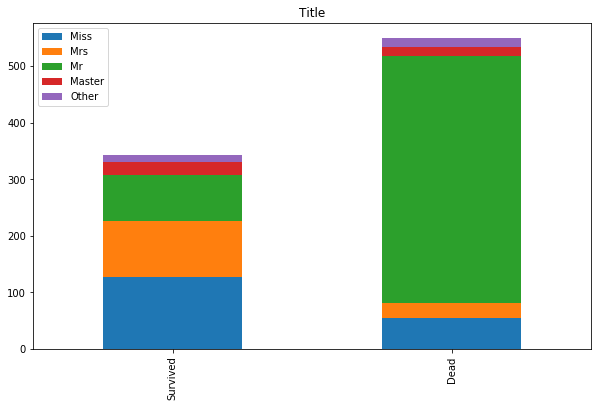

In [14]:
bar_chart(train_data, 'Title')

Passengers with "Master", "Mrs" or "Miss" title had much bigger chance to survive than passengers with "Mr" title.

### Sex

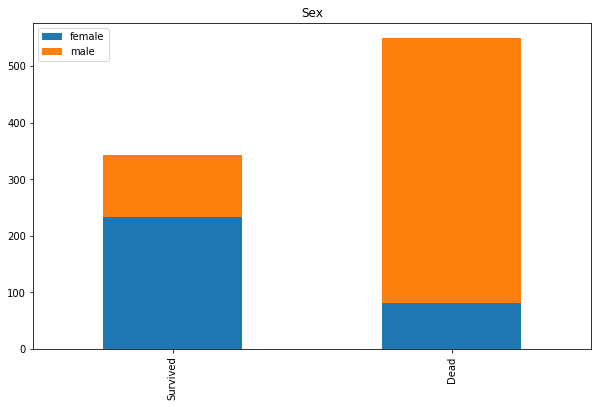

In [15]:
bar_chart(train_data, 'Sex')

More than 80% of male died and more than 70% of female survived. Sex has only two values so it can be binary coded.

In [16]:
sex_mapping = {'female': 0, 'male': 1}
train_data['Sex'] = train_data['Sex'].map(sex_mapping)
test_data['Sex'] = test_data['Sex'].map(sex_mapping)

### Age

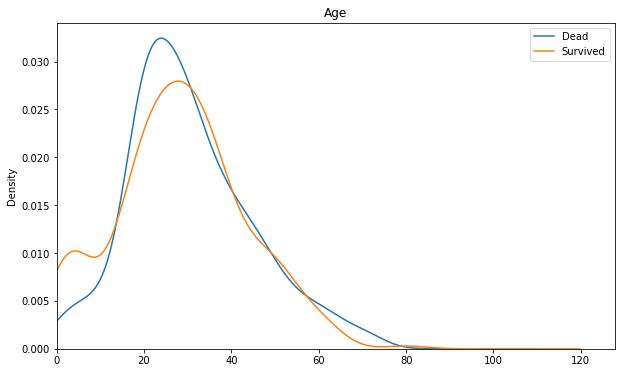

In [17]:
line_chart(train_data, 'Age')

Age is very important factor in survival prediction. Most of the passengers were 20-30 years old. Let's analize the smaller parts of the chart.

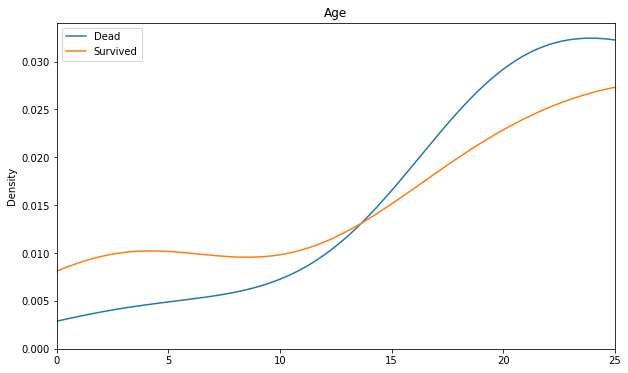

In [18]:
line_chart(train_data, 'Age', 0, 25)

Most of the children under 14 years old survived the shipwreck.

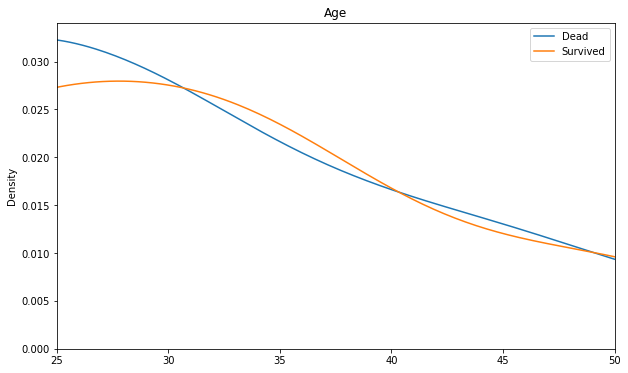

In [19]:
line_chart(train_data, 'Age', 25, 50)

Passengers between 32 and 41 years old were more likely to survive than other adults.

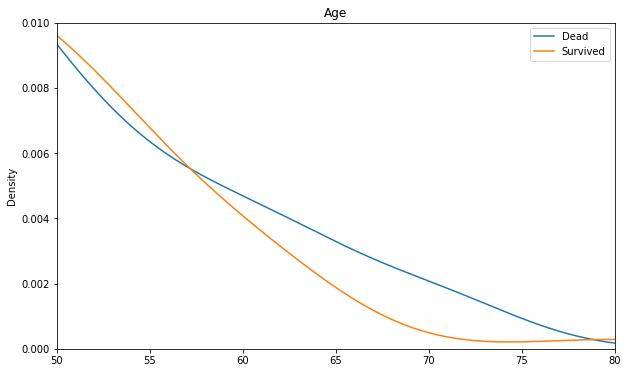

In [20]:
line_chart(train_data, 'Age', 50, 80, 0, 0.01)

There were few elderly people on the ship. Most of them died.

Missing values for age will be filled by using the median of the data, if it will be grouped by class, title and sex.

In [21]:
train_data['Age'].fillna(train_data.groupby(['Title', 'Pclass', 'Sex'])['Age'].transform('median'), inplace=True)
test_data['Age'].fillna(test_data.groupby(['Title', 'Pclass', 'Sex'])['Age'].transform('median'), inplace=True)

Age values can be assigned to one of five categories, depending on survivalibity.

In [22]:
def age_categories(age):
    if age <= 14:
        return "Children"
    elif 14 < age <= 20:
        return "Teenager"
    elif 20 < age <= 32:
        return "Young adult"
    elif 32 < age <= 41:
        return "Adult"
    elif 41 < age <= 58:
        return "Old adult"
    else:
        return "Elderly"
    
train_data['Age'] = train_data['Age'].map(age_categories)
train_data = pd.concat([train_data, pd.get_dummies(train_data['Age'])], axis=1)

test_data['Age'] = test_data['Age'].map(age_categories)
test_data = pd.concat([test_data, pd.get_dummies(test_data['Age'])], axis=1)

### Embarked

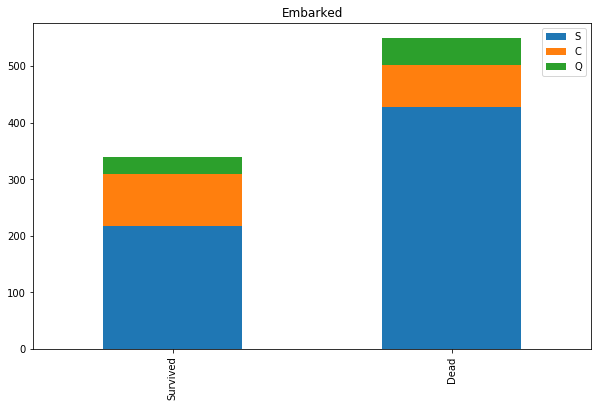

In [23]:
bar_chart(train_data, 'Embarked')

The most people boarded from *S* - Southampton. Missing data in *Embarked* category will be filled with that. People who boarded from other cities had much more chance of survive. 

In [24]:
train_data['Embarked'].fillna(train_data['Embarked'].value_counts().index[0], inplace=True)
test_data['Embarked'].fillna(test_data['Embarked'].value_counts().index[0], inplace=True)

train_data = pd.concat([train_data, pd.get_dummies(train_data['Embarked'])], axis=1)
test_data = pd.concat([test_data, pd.get_dummies(test_data['Embarked'])], axis=1)

### Fare

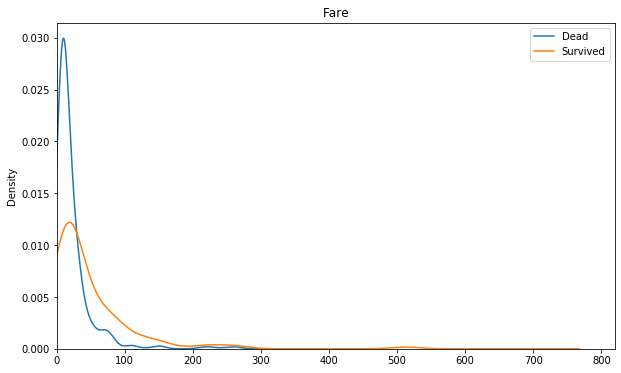

In [25]:
line_chart(train_data, 'Fare')

Most of the passengers paid the fare less than 100. Let's analize the smaller parts of the chart.

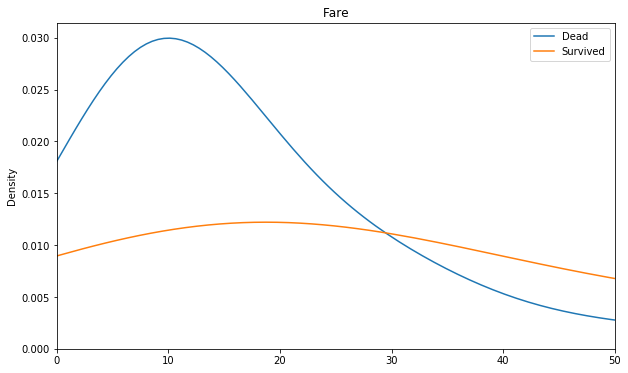

In [26]:
line_chart(train_data, 'Fare', 0, 50)

The most of the passengers paid 10. Passengers who paid less than 30 had low chance of survival. Passengers who paid more than 30 were more likely to survive.

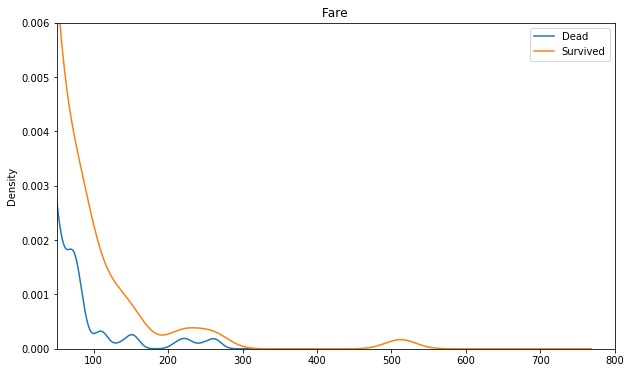

In [27]:
line_chart(train_data, 'Fare', 50, 800, 0, 0.006)

Everyone in training dataset, who paid more than 300 survived.

In [28]:
def fare_categories(fare):
    if fare <= 10:
        return "VeryLowF"
    elif 10 < fare <= 30:
        return "LowF"
    elif 30 < fare <= 300:
        return "HighF"
    else:
        return "VeryHighF"
    
train_data['Fare'].fillna(train_data.groupby('Pclass')['Fare'].transform('median'), inplace=True)
train_data['Fare'] = train_data['Fare'].map(fare_categories)

test_data['Fare'].fillna(test_data.groupby('Pclass')['Fare'].transform('median'), inplace=True)
test_data['Fare'] = test_data['Fare'].map(fare_categories)

### Family size

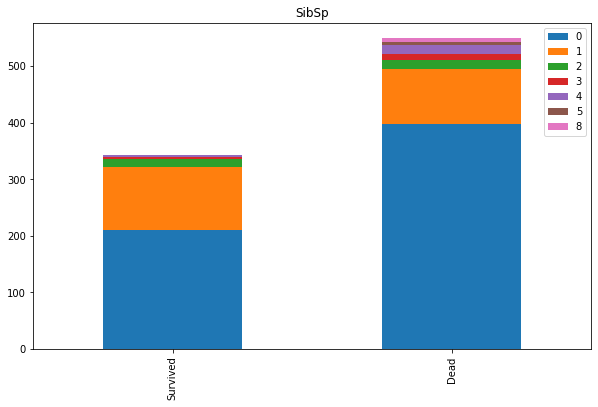

In [29]:
bar_chart(train_data, "SibSp")

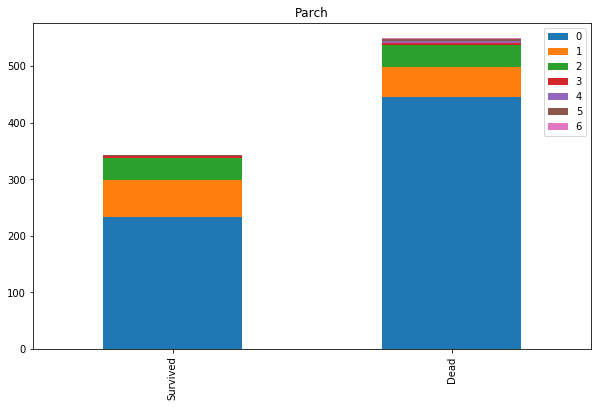

In [30]:
bar_chart(train_data, "Parch")

In the data there are two variables connected with passenger's family size - *SibSp* and *Parch* which describe number of siblings/spouses and parents/children aboard the Titanic. People with family aboard had much more chance of survival than people who were alone. Let's combine these two features and add a new one, which shows if someone is alone.

In [31]:
def prepare_family_size(data):
    data['FamilySize'] = data['SibSp'] + data['Parch']
    data['Alone'] = data['FamilySize'].map(lambda x: 1 if x == 0 else 0)
    return data

prepare_family_size(train_data)
prepare_family_size(test_data)


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,...,Children,Elderly,Old adult,Teenager,Young adult,C,Q,S,FamilySize,Alone
0,892,3,"Kelly, Mr. James",1,Adult,0,0,330911,VeryLowF,NaN,...,0,0,0,0,0,0,1,0,0,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,Old adult,1,0,363272,VeryLowF,NaN,...,0,0,1,0,0,0,0,1,1,0
2,894,2,"Myles, Mr. Thomas Francis",1,Elderly,0,0,240276,VeryLowF,NaN,...,0,1,0,0,0,0,1,0,0,1
3,895,3,"Wirz, Mr. Albert",1,Young adult,0,0,315154,VeryLowF,NaN,...,0,0,0,0,1,0,0,1,0,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,Young adult,1,1,3101298,LowF,NaN,...,0,0,0,0,1,0,0,1,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",1,Young adult,0,0,A.5. 3236,VeryLowF,NaN,...,0,0,0,0,1,0,0,1,0,1
414,1306,1,"Oliva y Ocana, Dona. Fermina",0,Adult,0,0,PC 17758,HighF,C105,...,0,0,0,0,0,1,0,0,0,1
415,1307,3,"Saether, Mr. Simon Sivertsen",1,Adult,0,0,SOTON/O.Q. 3101262,VeryLowF,NaN,...,0,0,0,0,0,0,0,1,0,1
416,1308,3,"Ware, Mr. Frederick",1,Young adult,0,0,359309,VeryLowF,NaN,...,0,0,0,0,1,0,0,1,0,1


### Deleting unnecessary data

After all data operations it's time to delete features that won't be used in model. In addition to features, that are divided into dummies we will also drop *Name* and *Ticket* because they don't describe anything useful to make predictions. 
*Cabin* feature is deleted because of too many missing values.
*PassengerId* also doesn't describe useful informations, so we will drop that from data. Before that, we save our indices because we will need that for solution submissions.

In [32]:
unnecessary_data = ['PassengerId', 'Name', 'Ticket', 'SibSp', 'Parch', 'Cabin', 'Title', 'Age', 'Embarked', 'Fare']

train_data = train_data.drop(unnecessary_data, axis=1)

ids = test_data['PassengerId']
test_data = test_data.drop(unnecessary_data, axis=1)

Prepared data for models:

In [33]:
train_data.head()

,Survived,Pclass,Sex,Master,Miss,Mr,Mrs,Other,Adult,Children,Elderly,Old adult,Teenager,Young adult,C,Q,S,FamilySize,Alone
0,0,3,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,1,0
1,1,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0
2,1,3,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1
3,1,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,1,0
4,0,3,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1


## Preparing training dataset for models

For my regression model we will have to separate labels from features

In [34]:
x_train = train_data.drop(['Survived'], axis=1)
y_train = train_data['Survived']

## Prediction models

To save solutions to csv we will use the function below:

In [35]:
def prepare_solution(ids, prediction, name='solution'):
    solution = pd.DataFrame({
        'PassengerId': ids,
        'Survived': prediction
    })

    solution.to_csv(f'{name}.csv', index=False)

Our prediction models will be a logistic regression and a decision tree.

To check classification correctness we will use the function below:

In [36]:
def classification_correctness(pred, y):
    N = y.shape[0]
    count = 0
    for n in range(N):
        if pred[n] == y[n]:
            count += 1
    return count/N

### Logistic regression

Sigmoid function definition

In [37]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

We will use regularized logistic cost function and gradient descent as optimization method.

Logistic regression class definition

In [38]:
class LogisticRegression:
    def __init__(self, w=None, lbd=0.003, eta=0.4, epochs=2000, theta=0.55):
        self.w = w
        self.lbd = lbd
        self.eta = eta
        self.epochs = epochs
        self.theta = theta

    def add_column_with_ones(self, x):
        N, M = x.shape
        x_train = np.ones((N, M + 1))
        x_train[:, 1:] = x
        return x_train

    def regularized_logistic_cost_function(self, w, x_train, y_train):
        N, M = x_train.shape
        sigma = sigmoid(x_train @ w)
        costFunction = -1 / N * np.sum(y_train * np.log(sigma) + (1 - y_train) * np.log(1 - sigma)) + (self.lbd / 2) * (
                    np.linalg.norm(w[1:]) ** 2)
        w_0 = w.copy()
        w_0[0] = 0
        grad = 1 / N * x_train.T @ (sigma - y_train) + self.lbd * w_0
        return costFunction, grad

    def gradient_descent(self, x_train, y_train, w0):
        w = w0
        for k in range(self.epochs):
            _, grad = self.regularized_logistic_cost_function(w, x_train, y_train)
            w = w - self.eta * grad
        return w

    def fit(self, x_train, y_train):
        x_train = self.add_column_with_ones(x_train)
        w0 = np.zeros(x_train.shape[1])
        self.w = self.gradient_descent(x_train, y_train, w0)

    def predict(self, x):
        x = self.add_column_with_ones(x)
        N = x.shape[0]
        sigm = sigmoid(x @ self.w)
        return np.array([int((sigm[i] >= self.theta)) for i in range(N)])


Generating solutions

In [39]:
    LRModel = LogisticRegression()
    LRModel.fit(x_train, y_train)
    prepare_solution(ids, LRModel.predict(test_data), 'regression')

Classification score for training dataset:

In [40]:
print(classification_correctness(LRModel.predict(x_train), y_train))

0.835016835016835


## Decision tree

As a criterion I will use a entropy, as a building tree algorithm I will use an ID3.

Define class that will use for tree structure and import libraries

In [41]:
from collections import Counter, defaultdict
import math

class Leaf:
    def __init__(self, value):
        self.value = value


class Split:
    def __init__(self, attribute, subtrees, default_value):
        self.attribute = attribute
        self.subtrees = subtrees
        self.default_value = default_value

Decision tree class definition:

In [42]:
class DecisionTree:
    def entropy(self, class_probabilities):
        sum = 0
        for p in class_probabilities:
            if p>0:
                sum += -p * math.log(p, 2)
        return sum

    
    def class_probabilities(self, labels):
        return [count / len(labels) for count in Counter(labels).values()]

    
    def partition_entropy(self, subsets):
        total_count = sum(len(subset) for subset in subsets)
        return sum(self.entropy(self.class_probabilities(subset)) * len(subset) / total_count
                   for subset in subsets)

    
    def make_partitions(self, inputs, attribute: str):
        partitions = defaultdict(list)
        for id, row in inputs.iterrows():
            key = row[attribute]
            partitions[key].append(row)
        return partitions

    
    def partition_entropy_by(self, x_train, attribute: str, label_attribute):
        partitions = self.make_partitions(x_train, attribute)
        labels = [[x[label_attribute] for x in partition]
                  for partition in partitions.values()]
        return self.partition_entropy(labels)

    
    def build_tree_id3(self, inputs, split_attributes, target_attribute):
        label_counts = Counter(row[target_attribute]
                               for id, row in inputs.iterrows())
        most_common_label = label_counts.most_common(1)[0][0]

        if len(label_counts) == 1 or not split_attributes:
            return Leaf(most_common_label)

        def split_entropy(attribute):
            return self.partition_entropy_by(inputs, attribute, target_attribute)

        best_attribute = min(split_attributes, key=split_entropy)

        partitions = self.make_partitions(inputs, best_attribute)
        new_attributes = [a for a in split_attributes if a != best_attribute]

        subtrees = {attribute_value: self.build_tree_id3(pd.DataFrame(subset),
                                                         new_attributes,
                                                         target_attribute)
                    for attribute_value, subset in partitions.items()}

        return Split(best_attribute, subtrees, most_common_label)

    
    def fit(self, x_train, label_name):
        columns = []
        for col in x_train.columns:
            if col != label_name:
                columns.append(col)
        tree = self.build_tree_id3(x_train, columns, label_name)
        self.tree = tree

        
    def classify(self, tree, input):
        if isinstance(tree, Leaf):
            return tree.value
        subtree_key = input[tree.attribute]

        if subtree_key not in tree.subtrees:
            return tree.default_value

        subtree = tree.subtrees[subtree_key]
        return self.classify(subtree, input)

    
    def predict(self, x):
        return [self.classify(self.tree, row) for id, row in x.iterrows()]


Generating solutions

In [43]:
TreeModel = DecisionTree()
TreeModel.fit(train_data, 'Survived')
prepare_solution(ids, TreeModel.predict(test_data), 'tree')

Classification score for training dataset:

In [45]:
print(classification_correctness(TreeModel.predict(train_data), y_train))

0.8653198653198653


## Results

After sending results to kaggle, we got the result below:
* Logistic regression: **0.79425**
* Tree : **0.75598**

The results are satisfactory. The logistic regression model was better at predicting survivalibity on Titanic. The decision tree model had better score for training dataset, so there is the possibility of overfitting. We can improve this model by creating random forest in the future.